In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import *

In [48]:
data = pd.read_csv('./data/MI_timesteps.txt',sep=' ')

In [49]:
def create_delay_embedding(data, delay):
    n_rows = len(data) - delay
    embedded_data = np.empty((n_rows, delay + 1))

    for i in range(n_rows):
        embedded_data[i] = data[i:i + delay + 1]

    return embedded_data.flatten()

Part 5.1

In [50]:
data.tail

<bound method NDFrame.tail of        timeStep  areaDensityCounting-PID5  areaDensityCounting-PID6  \
0             1                        36                         0   
1             2                        36                         0   
2             3                        43                         0   
3             4                        49                         0   
4             5                        59                         0   
...         ...                       ...                       ...   
14996     14997                         0                        10   
14997     14998                         0                        10   
14998     14999                         0                        10   
14999     15000                         0                        10   
15000     15001                         0                        11   

       areaDensityCounting-PID7  areaDensityCounting-PID8  \
0                             0                         

In [51]:
columns_of_interest = ['areaDensityCounting-PID5', 'areaDensityCounting-PID6', 'areaDensityCounting-PID7']
window_vectors = []

# Create Overlapping Windows
for start in range(len(data) - 350):
    window_data = []

    for col in columns_of_interest:
        col_data = data[col].values[start:start + 351]
        window_data.extend(create_delay_embedding(col_data, 350))

    window_vectors.append(window_data)

# Convert to a numpy array for PCA
window_matrix = np.array(window_vectors)

In [52]:
#total windows : 15001-351+1=14651, each window vector : 351X3=1053 
window_matrix.shape

(14651, 1053)

In [53]:
pca = PCA()  # Adjust the number of components if necessary
pca_result = pca.fit_transform(window_matrix)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_for_significant_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # 95% variance

# Transforming the data using the necessary number of principal components
pca_transformed_data = pca.transform(window_matrix)[:, :num_components_for_significant_variance]

# Shapes of the transformed data and number of components used
pca_transformed_data.shape, num_components_for_significant_variance

((14651, 6), 6)

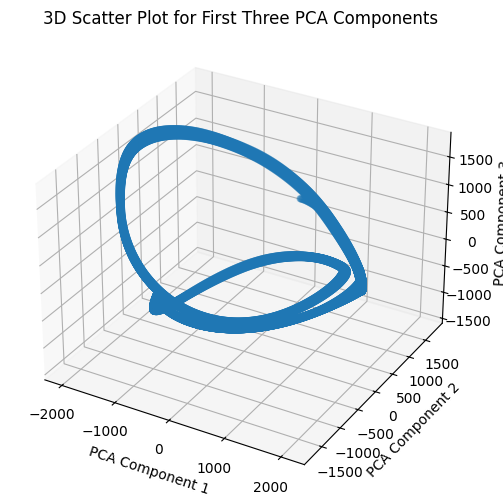

In [55]:
# prepare
x_original = window_matrix[:, :9]  
X_pca = pca_transformed_data

# 3D scatter plot for the first three PCA components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D Scatter Plot for First Three PCA Components')
plt.show()


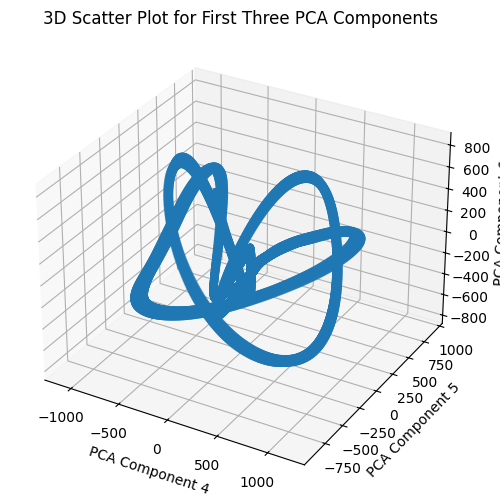

In [56]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 3], X_pca[:, 4], X_pca[:, 5])
ax.set_xlabel('PCA Component 4')
ax.set_ylabel('PCA Component 5')
ax.set_zlabel('PCA Component 6')
plt.title('3D Scatter Plot for First Three PCA Components')
plt.show()

Part 5.2

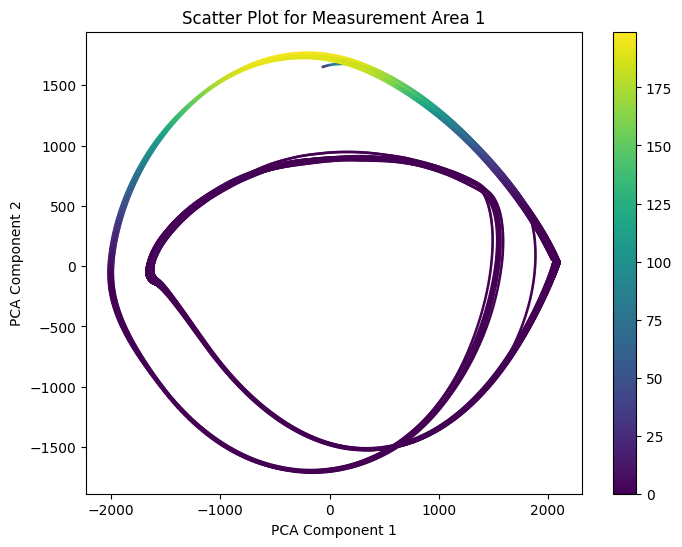

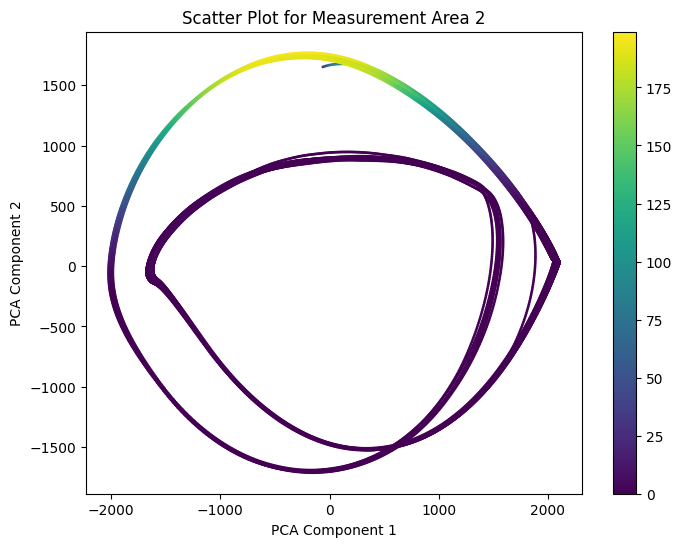

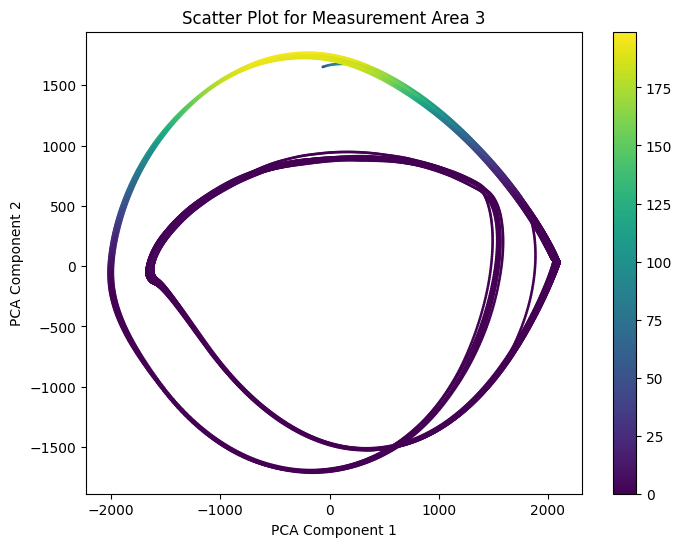

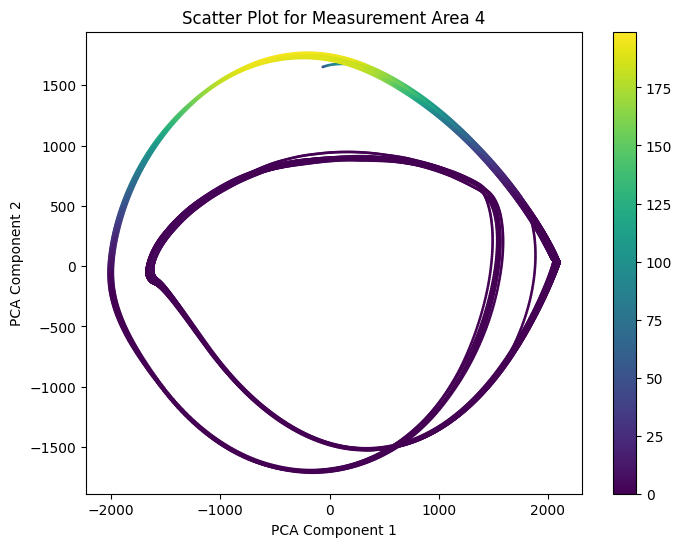

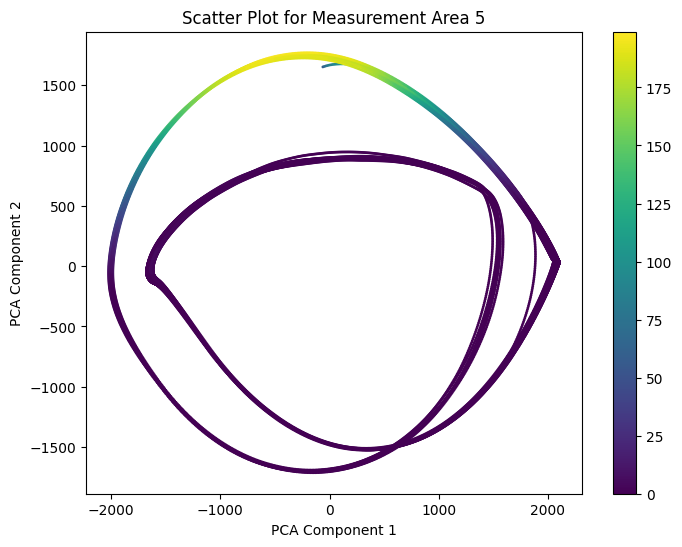

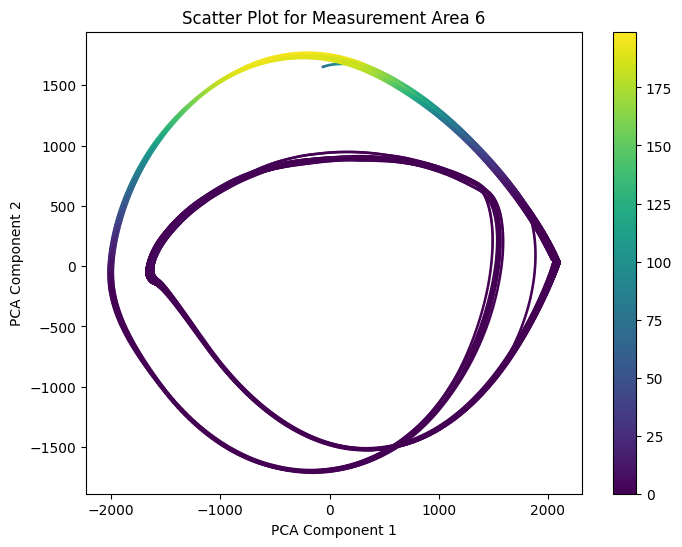

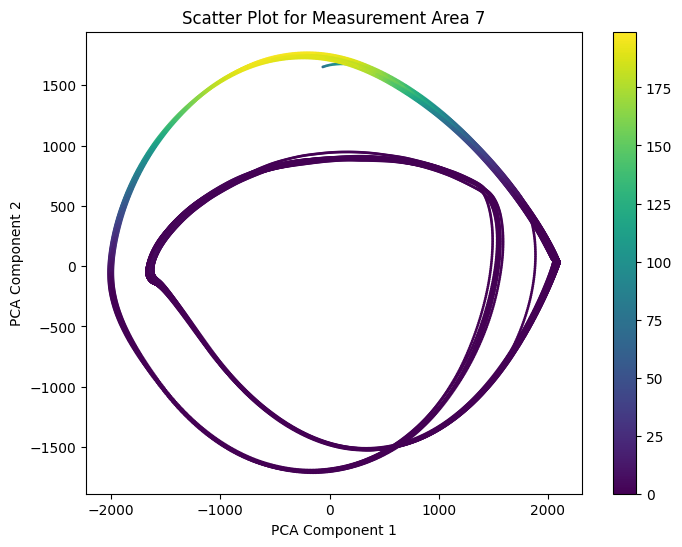

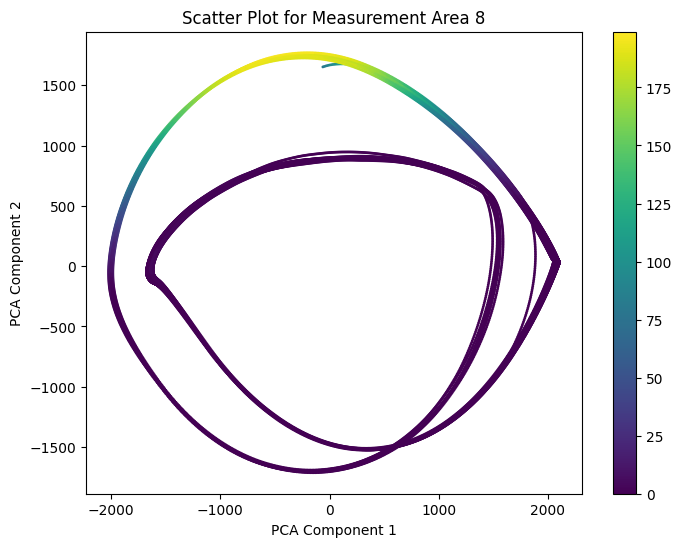

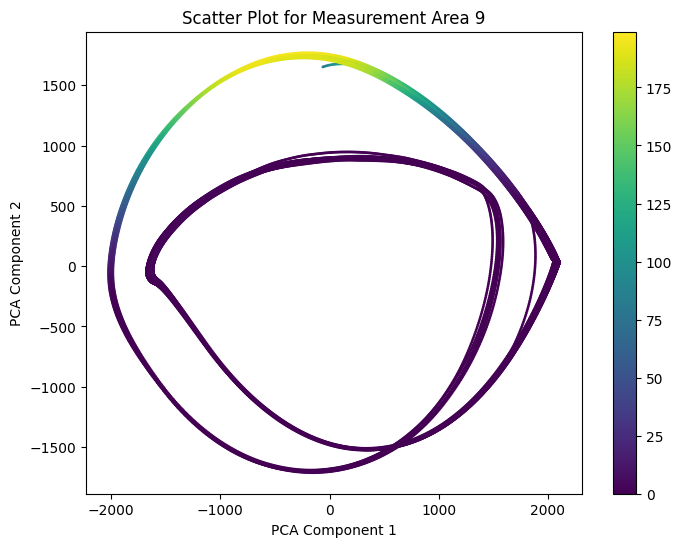

In [57]:
for i in range(9):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, c=x_original[:, i])
    plt.colorbar()
    plt.title(f'Scatter Plot for Measurement Area {i+1}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


Part 5.3

In [58]:
import numpy as np

# Assuming pca_transformed_data is ordered according to the time series
# Calculate the distances (deltas) between consecutive points
deltas = np.diff(pca_transformed_data, axis=0)

# Calculate the arclength between consecutive points (Euclidean distance)
arclengths = np.linalg.norm(deltas, axis=1)

# Compute the total arclength at each point
total_arclength = np.cumsum(arclengths)

# Assuming 'times' is the array of time steps corresponding to pca_transformed_data points
time_deltas = np.diff(times)

# Compute the velocity: change in arclength over change in time
velocities = arclengths / time_deltas

# Plotting velocity against total arclength
plt.figure(figsize=(10, 6))
plt.plot(total_arclength, velocities)
plt.xlabel('Arc length of the curve')
plt.ylabel('Velocity on arclength')
plt.title('Velocity as a Function of Arc Length in PCA Space')
plt.show()


NameError: name 'times' is not defined